<a href="https://colab.research.google.com/github/douniagh/MyApplication-/blob/main/Training5.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
 from sklearn.datasets import make_regression
 from sklearn.feature_selection import RFECV
 from sklearn import linear_model
 from sklearn import datasets
 import pandas as pd
 import numpy as np
 from sklearn.preprocessing import LabelEncoder
 from sklearn.preprocessing import OneHotEncoder
 from sklearn.preprocessing import MinMaxScaler
 import matplotlib.pyplot as plt
 from sklearn.model_selection import train_test_split, cross_val_score
 from sklearn.decomposition import PCA
 from sklearn import tree
 from sklearn.naive_bayes import GaussianNB
 from sklearn.linear_model import LogisticRegression
 from sklearn.neighbors import KNeighborsClassifier
 from sklearn.tree import DecisionTreeClassifier
 from sklearn.preprocessing import RobustScaler
 from sklearn.ensemble import RandomForestClassifier, RandomForestRegressor
 from sklearn.model_selection import train_test_split
 from sklearn.linear_model import LogisticRegression
 from sklearn.metrics import accuracy_score
 from collections import Counter
 from sklearn.utils import shuffle
 import seaborn as sns
# from fancyimpute import IterativeImputer
from google.colab import drive
drive.mount('/content/drive', force_remount=True)

Mounted at /content/drive


In [2]:
import dask.dataframe as dd
import pandas as pd

# Define the file path
file_path = '/content/drive/MyDrive/final.csv'

df = pd.read_csv(file_path,low_memory= False)
df.tail()

,frame.time,ip.src_host,ip.dst_host,arp.dst.proto_ipv4,arp.hw.size,arp.src.proto_ipv4,icmp.checksum,icmp.seq_le,http.file_data,http.content_length,...,tcp.srcport,udp.stream,dns.qry.name,mqtt.hdrflags,mqtt.len,mqtt.msgtype,mqtt.ver,mbtcp.len,Attack_label,Attack_type
19793243,81334,3,1,0,0,0,0,0,0,0,...,9763,0,0,3,4,4,0,0,0,0
19793244,111552,2,2,0,0,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,0
19793245,128124,2,2,0,0,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,0
19793246,54862,3,1,0,0,0,0,0,0,0,...,3270,0,0,0,0,0,0,0,0,0
19793247,177483,2,2,0,0,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,0


In [6]:
from sklearn import metrics

kernal_evals = dict()
def evaluate_classification(model, name, X_train, X_test, y_train, y_test):
    train_accuracy = metrics.accuracy_score(y_train, model.predict(X_train))
    test_accuracy = metrics.accuracy_score(y_test, model.predict(X_test))

    train_precision = metrics.precision_score(y_train, model.predict(X_train))
    test_precision = metrics.precision_score(y_test, model.predict(X_test))

    train_recall = metrics.recall_score(y_train, model.predict(X_train))
    test_recall = metrics.recall_score(y_test, model.predict(X_test))

    kernal_evals[str(name)] = [train_accuracy, test_accuracy, train_precision, test_precision, train_recall, test_recall]
    print("Training Accuracy " + str(name) + " {}  Test Accuracy ".format(train_accuracy*100) + str(name) + " {}".format(test_accuracy*100))
    print("Training Precesion " + str(name) + " {}  Test Precesion ".format(train_precision*100) + str(name) + " {}".format(test_precision*100))
    print("Training Recall " + str(name) + " {}  Test Recall ".format(train_recall*100) + str(name) + " {}".format(test_recall*100))

    actual = y_test
    predicted = model.predict(X_test)
    confusion_matrix = metrics.confusion_matrix(actual, predicted)
    cm_display = metrics.ConfusionMatrixDisplay(confusion_matrix = confusion_matrix, display_labels = ['Normal', 'Attack'])

    fig, ax = plt.subplots(figsize=(10,10))
    ax.grid(False)
    cm_display.plot(ax=ax)

In [4]:

from sklearn.ensemble import RandomForestClassifier

# Step 1: Load and preprocess the dataset
# data = dd.read_csv('intrusion_dataset.csv')

X = df.drop('Attack_label', axis=1)
y = df['Attack_label']

# Step 2: Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

Training Accuracy RandomForestClassifier 99.99991242804954  Test Accuracy RandomForestClassifier 99.99126975016935
Training Precesion RandomForestClassifier 99.99994518717347  Test Precesion RandomForestClassifier 99.99161506230749
Training Recall RandomForestClassifier 99.99987667122481  Test Recall RandomForestClassifier 99.99062869149405


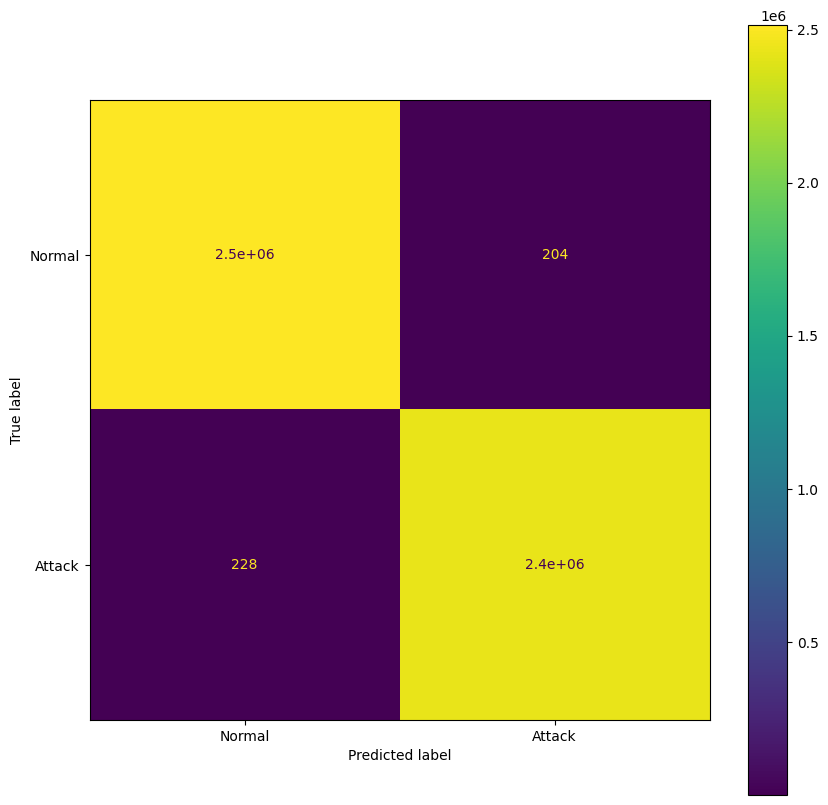

In [ ]:
rf = RandomForestClassifier(n_estimators=50, max_depth=10, n_jobs=-1).fit(X_train, y_train)
evaluate_classification(rf, "RandomForestClassifier", X_train, X_test, y_train, y_test)

Training Accuracy DecisionTreeClassifier 99.81984428898852  Test Accuracy DecisionTreeClassifier 99.8205852824155
Training Precesion DecisionTreeClassifier 99.9997249294891  Test Precesion DecisionTreeClassifier 99.9997112323202
Training Recall DecisionTreeClassifier 99.63379575685978  Test Recall DecisionTreeClassifier 99.63538211510433


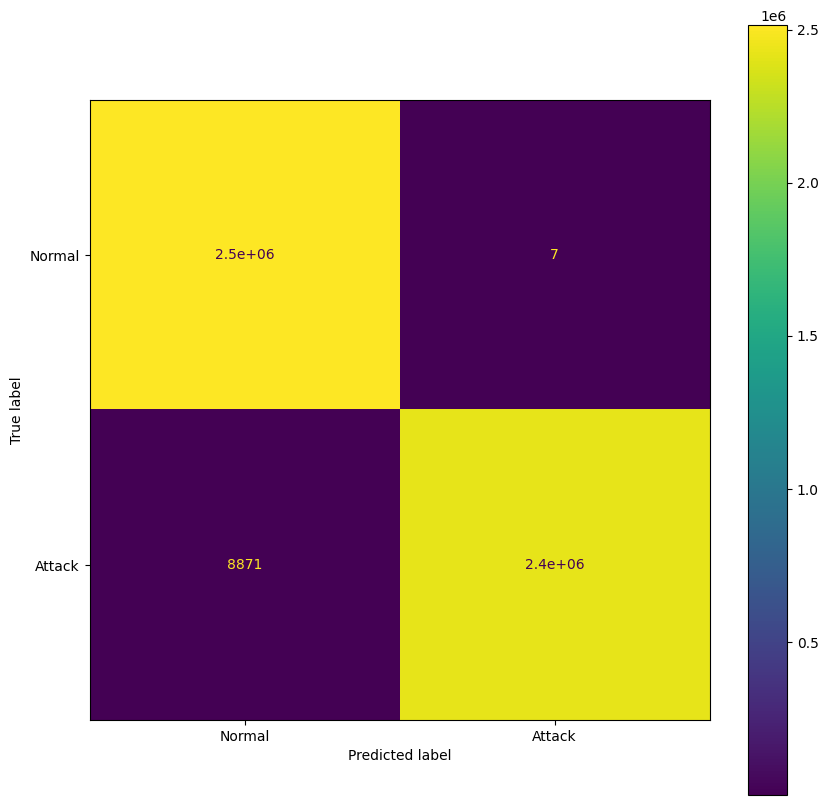

In [5]:
from sklearn.tree import DecisionTreeClassifier

dt = DecisionTreeClassifier(max_depth=3).fit(X_train, y_train)
evaluate_classification(dt, "DecisionTreeClassifier", X_train, X_test, y_train, y_test)

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Training Accuracy Logistic Regression 99.5009746084456  Test Accuracy Logistic Regression 99.50178970121529
Training Precesion Logistic Regression 99.78974332887923  Test Precesion Logistic Regression 99.79423196128451
Training Recall Logistic Regression 99.19386831254855  Test Recall Logistic Regression 99.19123141459903


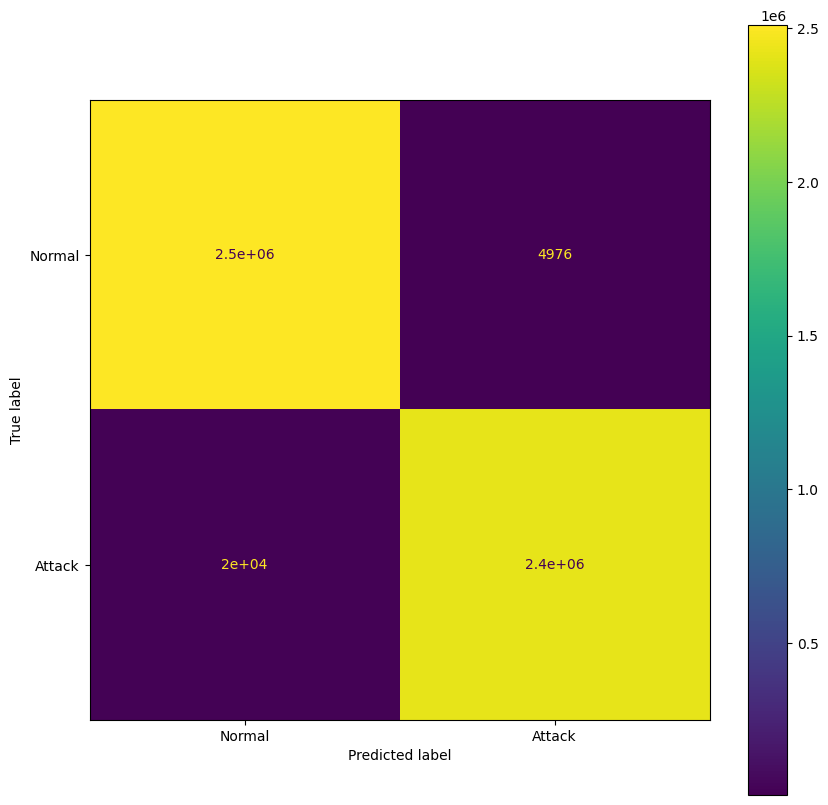

In [7]:
lr = LogisticRegression().fit(X_train, y_train)
evaluate_classification(lr, "Logistic Regression", X_train, X_test, y_train, y_test)